In [63]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astroquery.skyview import SkyView
import astropy.units as u
from astropy.io import fits
from astropy.visualization import ZScaleInterval

In [64]:
df_star = pd.read_csv('cleaned_star_data.csv')
df_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [65]:
display(df_star)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


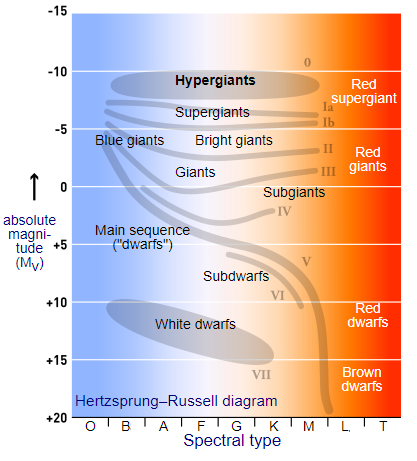

- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*

- \( L_0 = 3.828 \times 10^{26} \) Watts (Luminosidade média do Sol)
Esta é a luminosidade média do Sol, também conhecida como constante solar. A luminosidade é a quantidade total de energia que o Sol emite por segundo. É uma medida fundamental na astrofísica, pois permite aos cientistas determinar a distância e a composição de outras estrelas.

- \( R_0 = 6.9551 \times 10^8 \) m (Raio médio do Sol)
Este é o raio médio do Sol. É uma medida média porque o Sol não é uma esfera perfeita e seu raio pode variar um pouco em diferentes lugares.


- **0** → Brown Dwarf       
- **1** → Red Dwarf       
- **2** → White Dwarf      
- **3** → Main Sequence    
- **4** → Supergiants      
- **5** → Hypergiants   

In [66]:
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)
base_dir = f'E:/DESKTOP_2/Astronomical_Data/Astronomical/{folder_name}/'


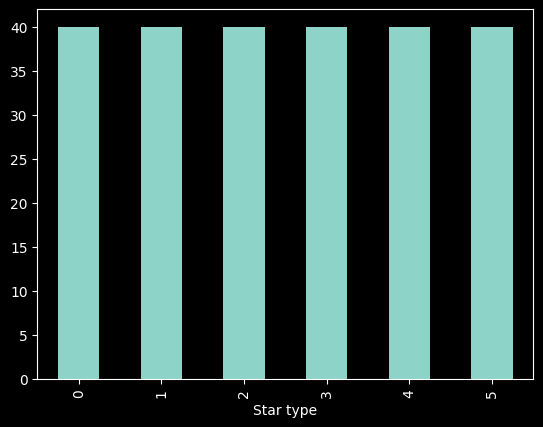

In [67]:
df_star['Star type'].value_counts().plot(kind='bar')
plt.show()

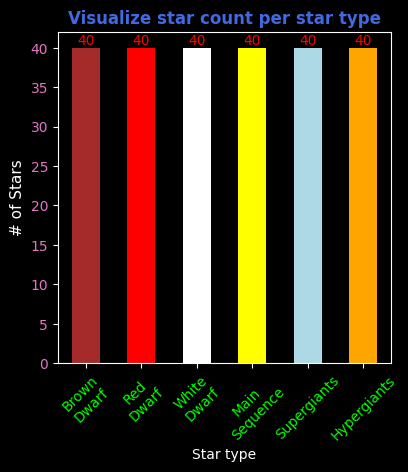

In [68]:
plt.figure(figsize=(4.3,4.3))
plt.style.use('dark_background')
ax = df_star['Star type'].value_counts().plot(kind='bar', color=['brown', 'red', 'white', 'yellow', 'lightblue', 'orange'])
ax.bar_label(ax.containers[0], color='red')
plt.title('Visualize star count per star type', color='royalblue', weight='bold')
plt.yticks(color='tab:pink')
plt.ylabel('# of Stars', color='white', fontsize=11)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'],
           rotation=45, color='lime')
plt.savefig(base_dir+'barplot_star_count.png')
plt.show()

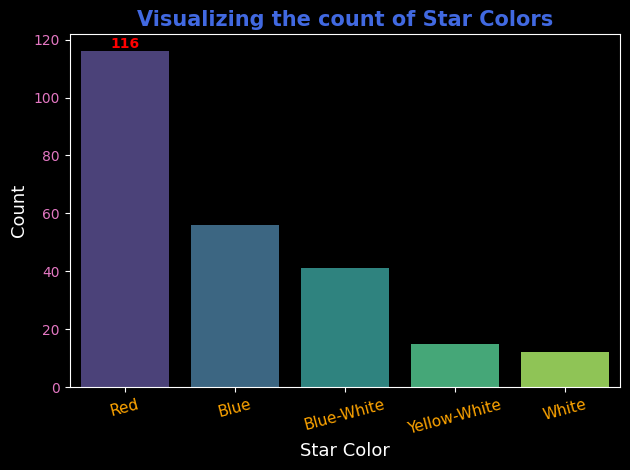

In [69]:
ax = sns.barplot(x=df_star['Star color'].value_counts().index,
                 y=df_star['Star color'].value_counts().values,
                 hue=df_star['Star color'].value_counts().index,
                 palette='viridis',
                 dodge=False)
ax.bar_label(ax.containers[0], color='red', weight='bold')
plt.title('Visualizing the count of Star Colors', color='royalblue', fontsize=15, weight='bold')
plt.xticks(rotation=15, color='orange', fontsize=11)
plt.xlabel('Star Color', color='white', fontsize=13)
plt.yticks(color='tab:pink')
plt.ylabel('Count', color='white', fontsize=13)
plt.tight_layout()
plt.savefig(base_dir + '/star_colors_viz.png')
plt.show()


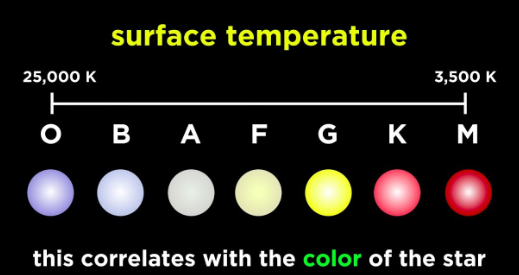

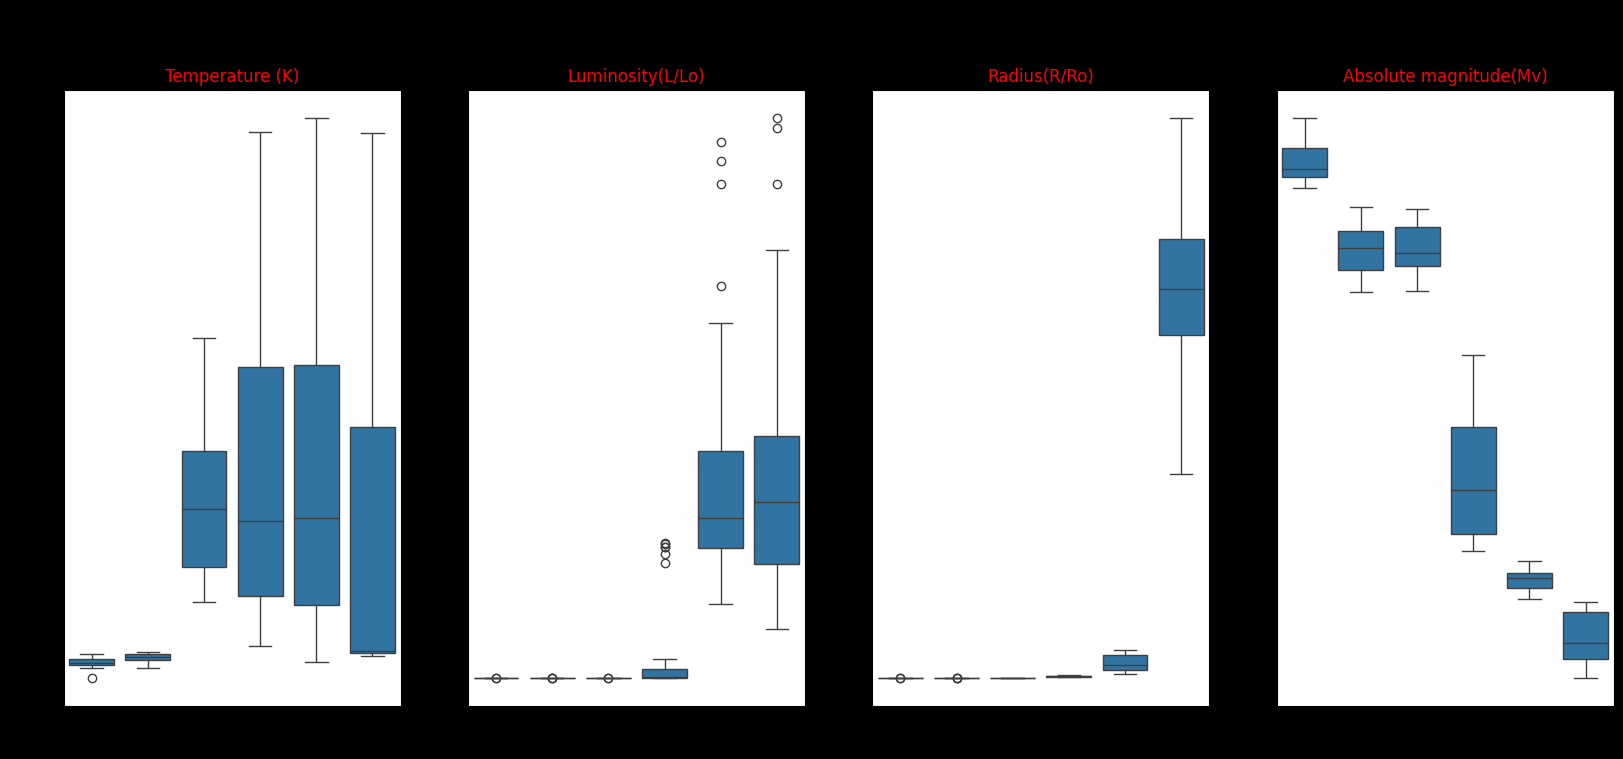

In [70]:
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             color='black', weight='bold', fontsize=15)

for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x=df_star['Star type'], y=df_star.iloc[:, i])
  plt.title(df_star.columns[i], color='red')
  plt.ylabel('')

plt.savefig(base_dir+'boxplot_star_type.png')

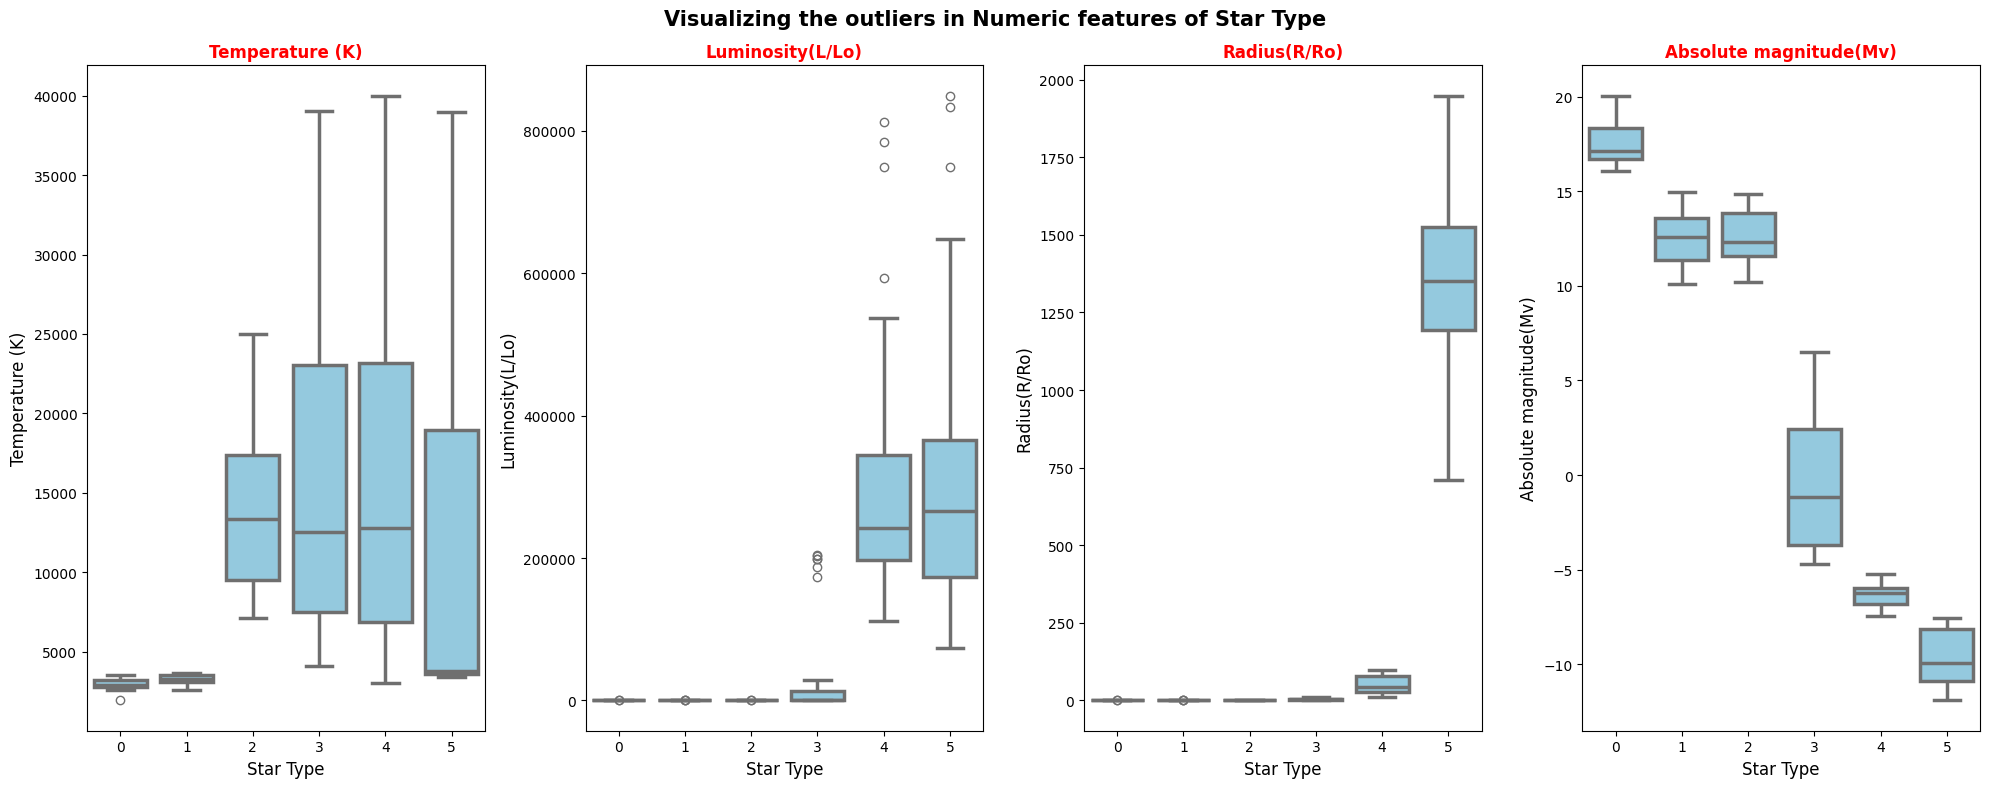

In [71]:
plt.figure(figsize=(20, 8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             color='black', weight='bold', fontsize=15)

for i, col in enumerate(df_star.columns[:4]):
    plt.subplot(1, 4, i+1)
    
    sns.boxplot(x=df_star['Star type'], y=df_star[col], color='skyblue', linewidth=2.5)
    
    plt.title(col, color='red', fontsize=12, weight='bold')
    plt.ylabel('{}'.format(col), fontsize=12)
    plt.xlabel('Star Type', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig(base_dir + 'boxplot_star_type.png')
plt.show()


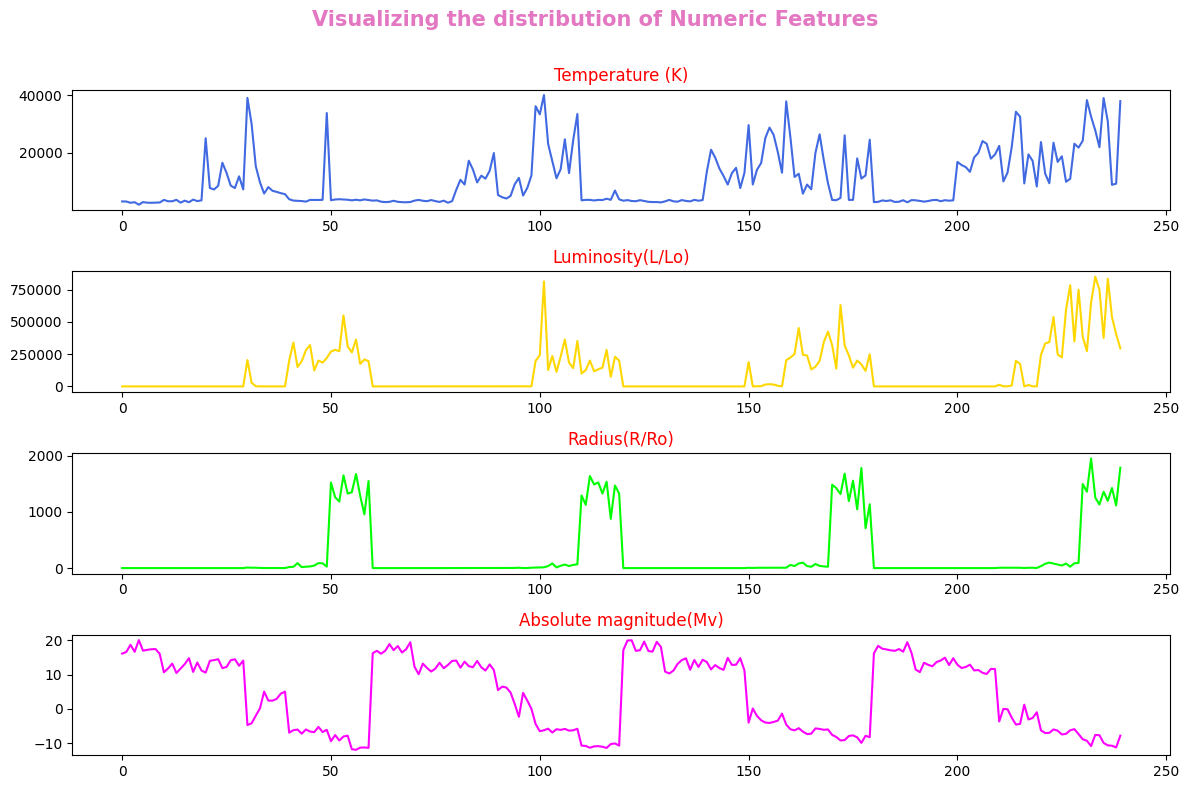

In [72]:
def line_subplot(df_star, colors, i):
    plt.plot(df_star.iloc[:, i], color=colors[i])
    plt.title(df_star.columns[i], color='red')

colors = ['royalblue', 'gold', 'lime', 'magenta']

plt.figure(figsize=(12, 8))
plt.suptitle('Visualizing the distribution of Numeric Features\n', color='tab:pink', fontsize=15, weight='bold')

for i in range(4):
    plt.subplot(4, 1, i+1)
    line_subplot(df_star, colors, i)

plt.tight_layout()
plt.savefig(base_dir + 'line_subplot.png')
plt.show()


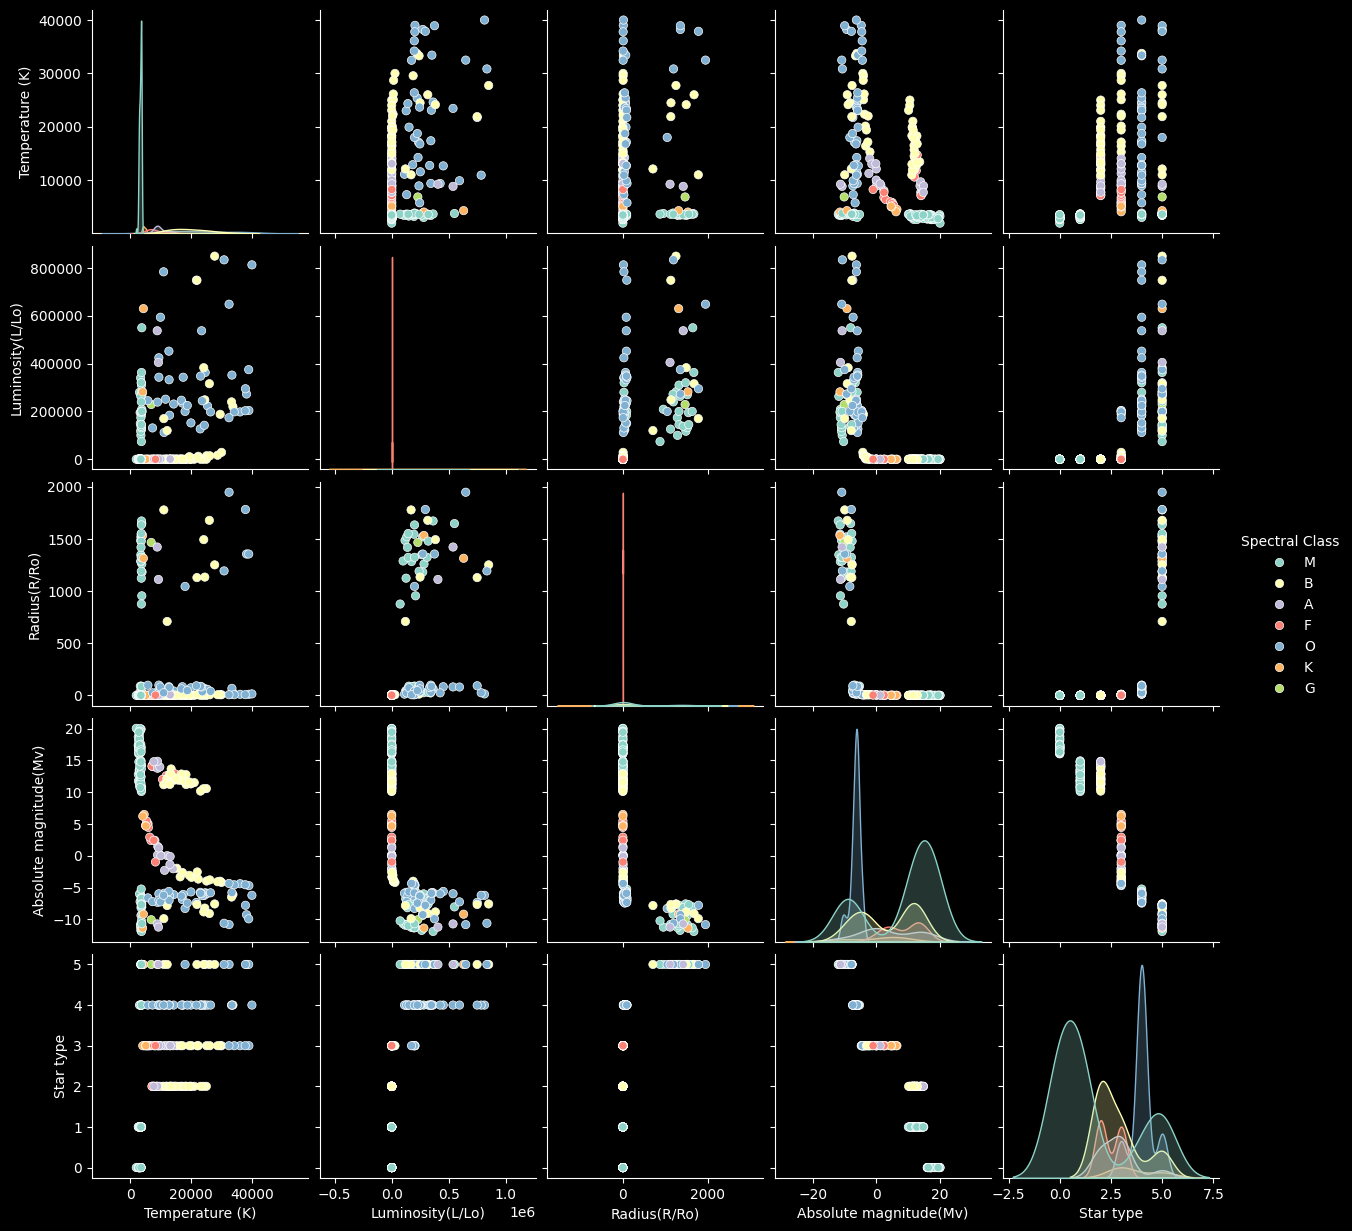

In [73]:
plt.style.use('dark_background')
sns.pairplot(df_star, hue='Spectral Class')
plt.savefig(base_dir+'pairplot.png')
plt.show()

### Create a scatter plot of HR diagram
- Using the information we have in our star_df let us try to create something like this:-
<img src = 'https://www.space.fm/astronomy/images/diagrams/hr.jpg'>

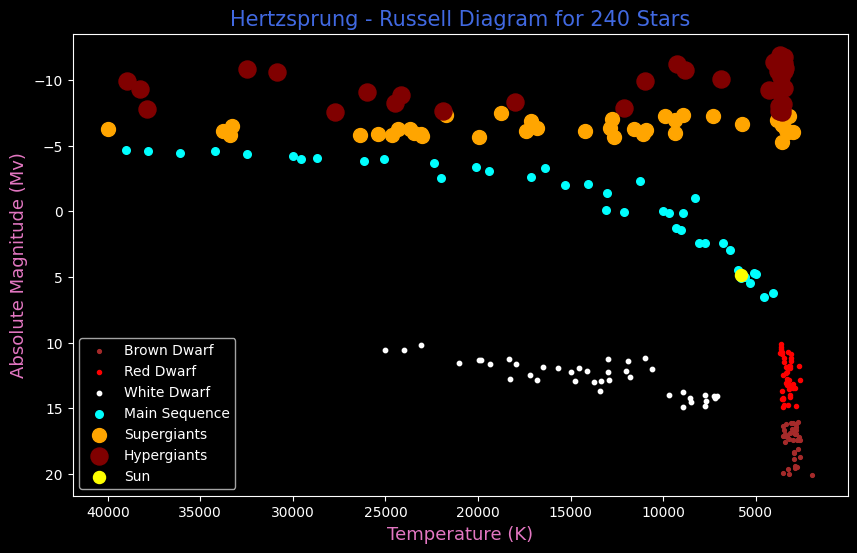

In [74]:
star_type = df_star['Star type'].values
temperature = df_star['Temperature (K)'].values
abs_mag = df_star['Absolute magnitude(Mv)'].values

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}
axes = []
labels = set()

plt.figure(figsize=(10, 6))

for i in range(len(star_type)):

  properties = star_types[star_type[i]]

  if properties['label'] not in labels:
    ax = plt.scatter(temperature[i], abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])
    axes.append(ax)
    labels.add(properties['label'])
  else:
    plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])

ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:pink')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:pink')
plt.legend(handles=axes)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(base_dir+'hr_diagram.png')
plt.show()

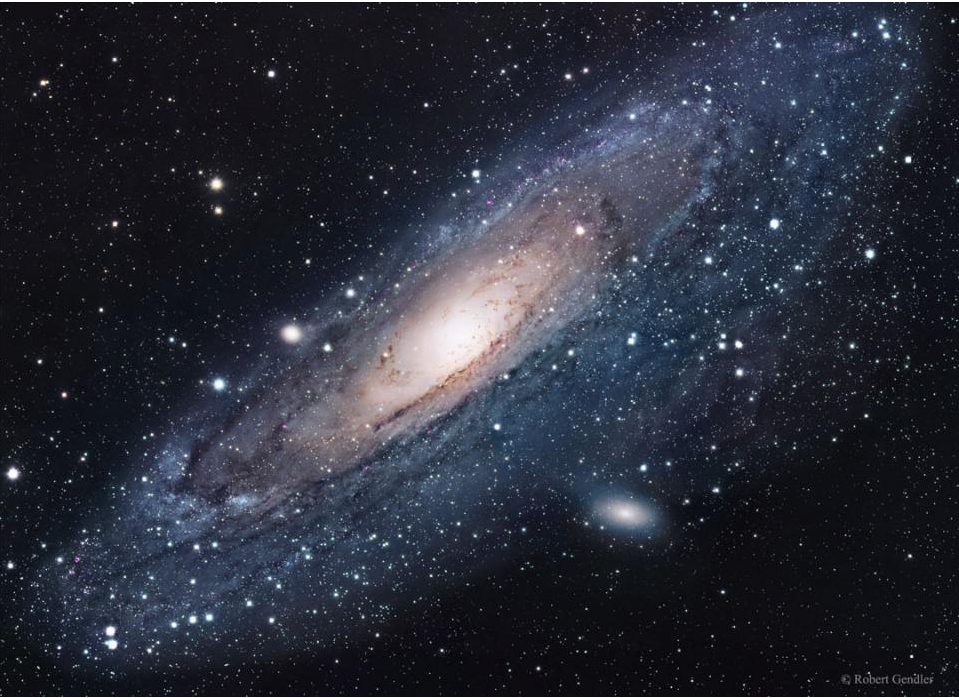

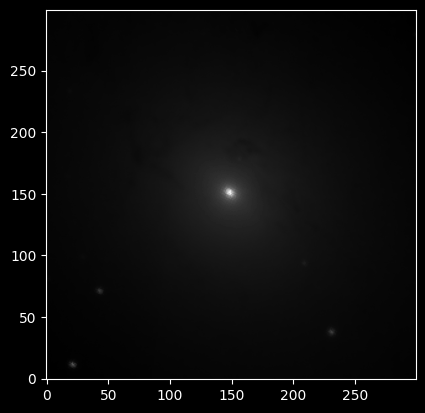

In [75]:
hdu = SkyView.get_images("M31", "SDSSg")[0][0]
M31_header = hdu.header
M31_Pixels = hdu.data
type(M31_Pixels)
M31_Pixels.shape
plt.savefig(base_dir+'galaxym.png')
plt.imshow(M31_Pixels, cmap='gray', origin='lower')

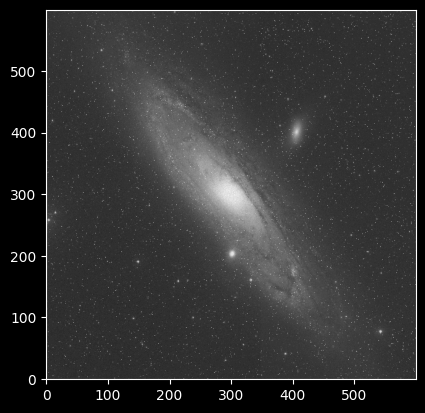

In [76]:
hdu = SkyView.get_images("M31", "DSS2 Blue",
                         pixels=600,
                         radius=150*u.arcmin)[0][0]

M31_DSS2_Blue_Pixels = hdu.data
plt.savefig(base_dir+'galaxym31.png')
plt.imshow(M31_DSS2_Blue_Pixels, cmap='gray', origin='lower')
